In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [78]:
import csv
train_epoch = []
train_cu_loss = []
train_avg_loss = []
train_cu_acc = []
train_avg_acc = []

test_epoch = []
test_cu_loss = []
test_avg_loss = []
test_cu_acc = []
test_avg_acc = []

e = 0
t = 0
with open("EDMN-theano/output_data/train_babi1_metadata.csv") as f:
    reader = csv.reader(f)

    for l in reader:
        if(len(l)==6):
            e = float(l.pop(0))
            if(e<=48):
                train_epoch.append(e*1000 + float(l.pop(0)))
                train_cu_loss.append(l.pop(0))
                avg_l = float(l.pop(0))
                train_avg_loss.append(avg_l)
                train_cu_acc.append(l.pop(0))
                train_avg_acc.append(l.pop(0))
with open("EDMN-theano/output_data/test_babi1_metadata.csv") as f:
    reader = csv.reader(f)
    for l in reader:
        if(len(l)==6):
            t = float(l.pop(0))
            if(t<=48):
                test_epoch.append(t*1000 + float(l.pop(0)))
                test_cu_loss.append(l.pop(0))
                test_avg_loss.append(l.pop(0))
                test_cu_acc.append(l.pop(0))
                test_avg_acc.append(l.pop(0))

print(e)
print(t)
print(np.shape(test_avg_loss))
print(np.shape(train_avg_loss))

50.0
49.0
(49000,)
(49000,)


In [75]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

train_avg_loss = moving_average(train_avg_loss)
#test_avg_loss = moving_average(test_avg_loss)
train_epoch.pop()
train_epoch.pop()
test_avg_loss.pop()
test_avg_loss.pop()
print(len(train_avg_loss))
print(len(train_epoch))

48998
48998


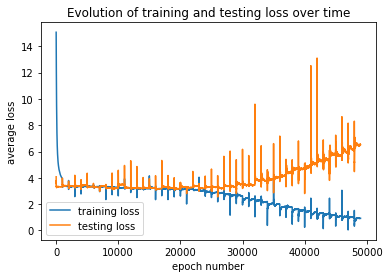

In [88]:
plt.figure()

plt.plot(train_epoch, train_avg_loss, label="training loss")
plt.plot(train_epoch, test_avg_loss, label="testing loss")
plt.legend()
plt.xlabel("epoch number")
plt.ylabel("average loss")
plt.title("Evolution of training and testing loss over time")
plt.savefig("avg_loss.jpg")

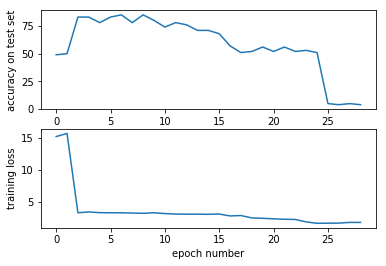

In [23]:
plt.figure()
plt.subplot(211)
plt.plot(epoch, acc)
plt.ylabel("accuracy on test set")
plt.xlabel("epoch number")
plt.subplot(212)
plt.plot(epoch, loss)
plt.ylabel("training loss")
plt.xlabel("epoch number")

plt.savefig("accAndLoss.jpg")